# Perceptron Lab

This is the scaffold notebook for the perceptron lab and each lab will have a similar scaffold.  Make your own copy of this notebook and then you can fill in the tasks.  **You will fill in code boxes and test boxes with discussion for most tasks** and particularly discussion of results, graphs, etc. Good writing, grammar, punctuation, etc. are important and points will be taken off if these things are lacking. 

In most cases just reporting results without discussion will not receive full credit. Thus, your discussion should also include sentences like the following: This is because…  Note that the …  I was surprised to observe… I am not sure why …, but my hypothesis is that …

Start by looking over the scikit-learn [user guide](https://scikit-learn.org/stable/user_guide.html) and carefully reading over the [perceptron documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html).

In [1]:
# imports
import numpy as np
from scipy.io import arff
import pandas as pd

## 1. Debug and Evaluation

For most labs we will give you some data and expected results so that you can verify that you are doing things right and getting appropriate results.  We will then have you run on some other data with the exact same hyperparameters so we can see if your results are correct. 

### 1.1 Debug (5%)
Download this [data set](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/linsep2nonorigin.arff) into your local directory and name it debug.arff.  To download rather than view, right-click the link and save as.  To allow consistent results run the Perceptron using the following hyperparameters:
- Learning rate = .1
- Do NOT shuffle the data after every epoch like you would normally do
- Learn for a maximum of 10 epochs
- Start all weights at 0 (which is the default for this scikit-learn implementation)  

Your results should be:
Accuracy = [.875]\
Final Weights = [[-0.23  0.18]]\
[-0.1] - This last weight is the bias weight, which they call the intercept.

To help you with this first task, following is one detailed variation that would do this for you. You may use your own variation.  Note that commonly used variable names in the community are clf (classifier), X (array of input features), y (vector of output labels).

In [2]:
from sklearn.linear_model import Perceptron

PATH_TO_DEBUG_ARFF = 'datasets/linsep2nonorigin.arff'

clf = Perceptron(shuffle=False, verbose=0, eta0=.1, max_iter=10)
Data_Set = arff.loadarff(PATH_TO_DEBUG_ARFF)
Data_Set_df = pd.DataFrame(Data_Set[0])
Data_Set_np = Data_Set_df.to_numpy()
Data_Set_np = Data_Set_np.astype(float)
X = Data_Set_np[:, :-1]
y = Data_Set_np[:, -1]
clf.fit(X, y)
print(clf.coef_)
print(clf.intercept_)
print(clf.score(X, y))

[[-0.23  0.18]]
[-0.1]
0.875


/Users/tylertrommlitz/miniconda3/envs/cs270/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Notes:
* If you increase (or just remove) max_iter your perceptron will converge to 100% in one more epoch.  Try it!
* verbose (integer) specifies how much info you get after each epoch.  It does not change results.  Try it with 0.
    * Norm is a measure of the total weight magnitudes in the current model.
    * NNZs is the number of non-zero weights there currently are (not including the bias).
    * clf.intercept_ is the value of the bias weight, NOT the actual y-intercept of the decision surface, though it will affect that.
    * T is the total number of weight updates so far.  In this case all the weights were updated each epoch.
    * Avg. loss is another measure of error.  More on that later.
    * The activation function outputs 1 if net > 0, else 0.

### 1.2 (5%) Evaluation

Now run your model  on the [evaluation dataset](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/data_banknote_authentication.arff) and report the final accuracy, weights, and bias. Use the exact same hyperparameters as the debug dataset. The most common reason for results not matching ours is not exactly using the same hyperparameters (e.g. initial weights, training exactly 10 epochs, no shuffling, etc.) Hint: Throughout these labs for the numerous cases where you are doing the same task, but with different data (e.g. debug, eval), you could create a function where you just pass the data set name, so as not to recreate the code multiple times.

In [3]:
# Load evaluation data
# Train on the evaluation data
# print your accuracy and weights. Do not enter these values by hand.

PATH_TO_EVAL_ARFF = 'datasets/data_banknote_authentication.arff'

clf = Perceptron(shuffle=False, verbose=0, eta0=.1, max_iter=10)
Data_Set = arff.loadarff(PATH_TO_EVAL_ARFF)
Data_Set_df = pd.DataFrame(Data_Set[0])
Data_Set_np = Data_Set_df.to_numpy()
Data_Set_np = Data_Set_np.astype(float)
X = Data_Set_np[:, :-1]
y = Data_Set_np[:, -1]
clf.fit(X, y)
print('Accuracy:', clf.score(X, y))
print('Weights:', clf.coef_)
print('Bias:', clf.intercept_)


Accuracy: 0.9766763848396501
Weights: [[-4.28857497 -2.390381   -3.0160324  -1.1686672 ]]
Bias: [5.2]


*Discussion - Open this box and type in your discussion.*  Note that after each exercise you will have a chance to discuss your effort and results.

This perceptron is attempting to predict the value of the last column in the dataset, which is entropy_wavelet, using the values of the other features in the dataset. When fitting and testing with the given evaluation dataset, the perceptron gained an accuracy of .977. It is interesting that the accuracy is less than 1, considering that we are are trying to predict the same outcomes that the perceptron was trained on. Our final weights are the vector [-4.28857497 -2.390381   -3.0160324  -1.1686672 ]. These are assigning value to each of the 4 input features and how much they should be considered when predicting the output. The bias is 5.2, which affects the perceptron's threshold and shifts the decision boundary up. 


## 2. Classifying on linearly separable and non-linearly separable data

### 2.1 (5%) Create 2 datasets

- Both with 8 instances using 2 real valued inputs with 4 instances from each class. 
- One data set should be linearly separable and the other not.
- Show or print your datasets

In [4]:
# Create and show the 2 datasets. 
# You could do it here in Python or create arff files in your local folder with a text editor.  Either way show your dataset.
dataset_1 = np.array([[.5, 2.5, 1], [1.5, 2.5, 1], [.5, 1.5, 1], [1.5, 1.5, 1], [3.5, .5, 1], [4.5, .5, 1], [3.5, 1.5, 1], [4.5, 1.5, 1]])
labels_1 = np.array([1, 1, 1, 1, 0, 0, 0, 0])
dataset_2 = np.array([[1, 1, 1], [1, 2, 1], [2, 1, 1], [2, 2, 1], [3, 1, 1], [3, 2, 1], [4, 1, 1], [4, 2, 1]])
labels_2 = np.array([1, 0, 0, 1, 1, 0, 0, 1])

print('liearly separable dataset:', dataset_1)
print('Non-linearly separable dataset:', dataset_2)


liearly separable dataset: [[0.5 2.5 1. ]
 [1.5 2.5 1. ]
 [0.5 1.5 1. ]
 [1.5 1.5 1. ]
 [3.5 0.5 1. ]
 [4.5 0.5 1. ]
 [3.5 1.5 1. ]
 [4.5 1.5 1. ]]
Non-linearly separable dataset: [[1 1 1]
 [1 2 1]
 [2 1 1]
 [2 2 1]
 [3 1 1]
 [3 2 1]
 [4 1 1]
 [4 2 1]]


### 2.2 (5%) Train on both sets using the scikit-learn perceptron model
- Train on each and print the results. Train until convergence (i.e. use the default max_iter by simply not specifying it).
- You may choose your other hyperparameters.

In [5]:
# Train and print results with both datasets 

clf = Perceptron(shuffle=False, verbose=0, eta0=.1)
clf.fit(dataset_1, labels_1)
print('Dataset 1 Accuracy:', clf.score(dataset_1, labels_1))
print('Dataset 1 Weights:', clf.coef_)
print('Dataset 1 Bias:', clf.intercept_)
dataset_1_weights = clf.coef_
dataset_1_bias = clf.intercept_

clf = Perceptron(shuffle=False, verbose=0, eta0=.1)
clf.fit(dataset_2, labels_2)
print('Dataset 2 Accuracy:', clf.score(dataset_2, labels_2))
print('Dataset 2 Weights:', clf.coef_)
print('Dataset 2 Bias:', clf.intercept_)
dataset_2_weights = clf.coef_
dataset_2_bias = clf.intercept_


Dataset 1 Accuracy: 1.0
Dataset 1 Weights: [[-0.35  0.45  0.1 ]]
Dataset 1 Bias: [0.1]
Dataset 2 Accuracy: 0.5
Dataset 2 Weights: [[ 0.5 -0.1 -0.2]]
Dataset 2 Bias: [-0.2]


*Discussion*

Training the perceptron on the linearly separable dataset resulted in an accuracy of 100%. Training it on the non-linearly separable dataset resulted in an accuracy of 50%. This is because the perceptron performs worse on data that is not linearly separable due to its design. An accuracy of 50% is the same as randomly guessing the output, meaning that the perceptron did not actually learn anything from the data. Both of these results make sense when looking at the structure of the datasets below. 

### 2.3 (10%) Graph the datasets and their corresponding decision line
 
 - Graph each dataset
 - Use your trained perceptrons above to determine each dataset's decision line
    - We discssed how to find the slope and intercept in class and the equation is in the Percptron slides
 - For all graphs always label the axes!
 - Following are examples of what graphs could look like
 
![Linearly Separable Data](https://raw.githubusercontent.com/rmorain/CS472-1/master/images/perceptron/linearly_separable.png)

![Not Linearly Separable](https://raw.githubusercontent.com/rmorain/CS472-1/master/images/perceptron/not_linearly_separable.png)

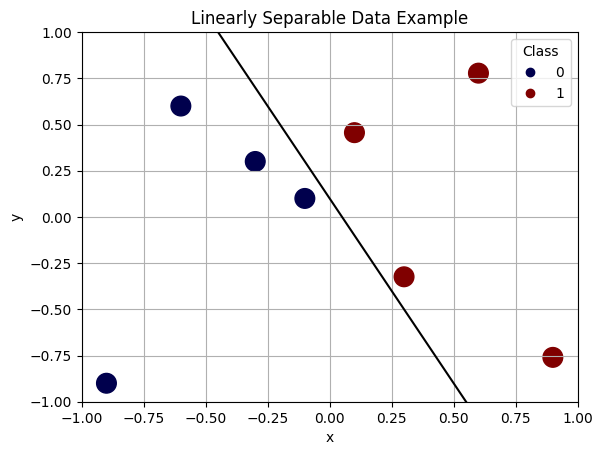

In [6]:
# Sample Graph code, You can use any graphing approach you want including this one.
# We encourage you to use matplotlib.
import matplotlib.pyplot as plt

# The data in this example is made up.  You will use your real data.
data = np.array([[-.9,-.9],[-.6,.6],[-.3,.3],[-.1,.1],[.1,.456],[.3,-.324],[.6,.778],[.9,-.76]])
labels = np.array([0,0,0,0,1,1,1,1])

# Create a scatter plot of data
plt.xlim(-1,1)
plt.ylim(-1,1)
scatter = plt.scatter(data[:,0], data[:,1], c = labels, s=200, cmap='seismic')
legend = plt.legend(*scatter.legend_elements(num=1), title="Class", loc='upper right') # Legend

# Plot the learned separator.  We just made up the slope and intercept for this example. You need to calculate 
# the correct slope and intercept using your learned weights and bias.
xlist = np.linspace(-1.0, 1.0, 100) # create 100 evenly spaced points between -1 and 1 for the x axis
ylist = np.linspace(-1.0, 1.0, 100) # create 100 evenly spaced points between -1 and 1 for the y axis
slope = -2  # made up
intercept = 0.1 # made up
eq = slope*xlist + intercept
plt.plot(xlist,  eq, '-k', )
plt.title('Linearly Separable Data Example')
plt.xlabel('x')
plt.ylabel('y')
plt.grid() # add grid lines
plt.show() # show the plot

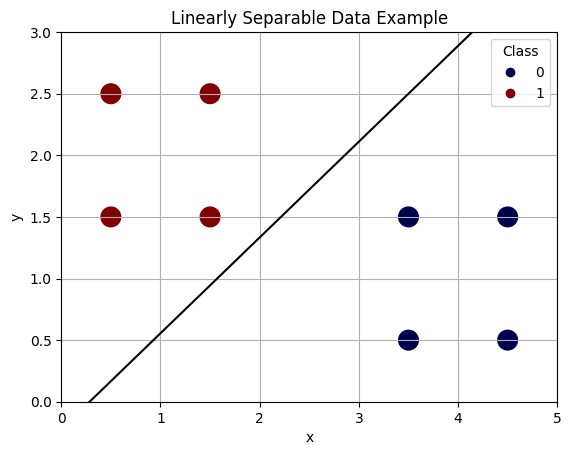

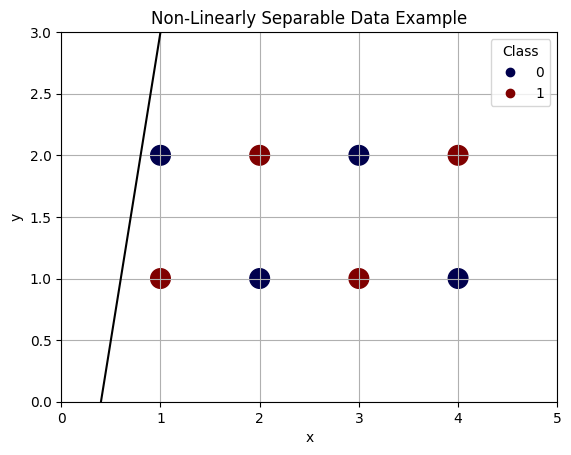

In [7]:
import matplotlib.pyplot as plt

# Create a scatter plot of data
plt.xlim(0,5)
plt.ylim(0,3)
scatter = plt.scatter(dataset_1[:,0], dataset_1[:,1], c = labels_1, s=200, cmap='seismic')
legend = plt.legend(*scatter.legend_elements(num=1), title="Class", loc='upper right') # Legend

# Plot the learned separator.  We just made up the slope and intercept for this example. You need to calculate 
# the correct slope and intercept using your learned weights and bias.
xlist = np.linspace(0, 5, 100) # create 100 evenly spaced points between 0 and 5 for the x axis
ylist = np.linspace(0, 3, 100) # create 100 evenly spaced points between 0 and 3 for the y axis
slope = (-1 * dataset_1_weights[0][0]) / dataset_1_weights[0][1]
intercept = -1 * dataset_1_weights[0][2] / dataset_1_weights[0][1]
eq = slope*xlist + intercept
plt.plot(xlist,  eq, '-k', )
plt.title('Linearly Separable Data Example')
plt.xlabel('x')
plt.ylabel('y')
plt.grid() # add grid lines
plt.show() # show the plot



# Create a scatter plot of data
plt.xlim(0,5)
plt.ylim(0,3)
scatter = plt.scatter(dataset_2[:,0], dataset_2[:,1], c = labels_2, s=200, cmap='seismic')
legend = plt.legend(*scatter.legend_elements(num=1), title="Class", loc='upper right') # Legend

# Plot the learned separator.  We just made up the slope and intercept for this example. You need to calculate
# the correct slope and intercept using your learned weights and bias.
xlist = np.linspace(0, 5, 100) # create 100 evenly spaced points between 0 and 5 for the x axis
ylist = np.linspace(0, 3, 100) # create 100 evenly spaced points between 0 and 3 for the y axis
slope = (-1 * dataset_2_weights[0][0]) / dataset_2_weights[0][1]
intercept = -1 * dataset_2_weights[0][2] / dataset_2_weights[0][1]
eq = slope*xlist + intercept
plt.plot(xlist,  eq, '-k', )
plt.title('Non-Linearly Separable Data Example')
plt.xlabel('x')
plt.ylabel('y')
plt.grid() # add grid lines
plt.show() # show the plot

*Discussion*

Because the first dataset is linearly separable, the perceptron is able to find a decision boundary that perfectly separates the data. If the perceptron is tested against new instances, it will predict based off of this decision boundary. The line that makes up the decision boundary is generated from the weights and bias discovered when training the model. The weights disovered by the model are just one possible set of weights that would result in a decision boundary that perfectly separates the data.

The second datasest is not linearly separable. In fact, the points are set up so that there is no possibility of a decision line classifying even slightly. Specifically, the alternating pattern of the instances is the worst possible case for the perceptron. Because of this, the perceptron completely fails to learn anything about the data to help predict future test instances. There is no set of weights that will help the model classify instances. The model has an accuracy of 50%, which is no better than guessing. The decision boundary that is generated is completely useless, and it should not be relied upon to classify new instances with any degree of confidence.

### 2.4 (5%) Discuss why perceptrons in general will not get perfect accuracy on non-linearly separable data

*Discussion*

Perceptrons are meant to give binary output. For example, it can classify an instance into 1 of 2 classes, or it can say whether an instance is in a class or not. The perceptron learns by adjusting the weights to try to create a hyperplane that separates the input data by class. If the dataset is not linearly-separable, it will be impossible for the weights to represent a hyperplane that separates the data perfectly. This is why perceptrons will not get perfect accuracy on non-linearly separable data.

## 3. Use the perceptron to learn this version of the [voting data set](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/voting-dataset.arff)

This particular task is an edited version of the standard voting set, where we have replaced all the “don’t know” values with the most common value for the particular attribute. Look at the [tutorial](https://github.com/cs472ta/CS472/blob/master/Tutorial.ipynb) from the Labs Content page to see examples of prepping the voting data set for sklearn.

### 3.1 (10%) Average final training and test set accuracy over multiple trials

- Learn the voting data five times with different random 70/30 Training/Test splits each time
- Use a learning rate of 1.  The other hyperparameters are up to you.
- Report the 5 trials and the average training and test accuracy and number of epochs to converge across the 5 trials in a table 
    - Below is an example of what a 2 trial table might look like

| Trial | Training Accuracy | Test accuracy | Number of epochs |
| --- | --- | --- | --- |
| 1 | .950 | .550 | 4 |
| 2 | .850 | .450 | 6 |
| Average | .900 | .500 | 5 | 

*- As a rough sanity check, typical Perceptron test accuracies for the voting data set are 90%-98%.*


In [8]:
# Run the perceptron 5 times on the voting data set with different splits and record the results.
# Hint: look up scikit-learn train_test_split
# Create the table using the tool of your choice

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tabulate import tabulate

PATH_TO_VOTING_ARFF = 'datasets/voting-dataset.arff'

Data_Set = arff.loadarff(PATH_TO_VOTING_ARFF)
Data_Set_df = pd.DataFrame(Data_Set[0])
voting_label_encoded_df = Data_Set_df.apply(LabelEncoder().fit_transform)

X = voting_label_encoded_df.iloc[:, :-1]
y = voting_label_encoded_df.iloc[:, -1]

table_head = ['Trial', 'Training Accuracy', 'Test Accuracy', 'Number of Epochs']
table_results = []

for i in range(5):
    clf = Perceptron(shuffle=False, verbose=0, eta0=1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    clf.fit(X_train, y_train)
    # add results to table
    table_results.append([i + 1, clf.score(X_train, y_train), clf.score(X_test, y_test), clf.n_iter_])

table_results.append(['Average', np.mean(table_results, axis=0)[1], np.mean(table_results, axis=0)[2], np.mean(table_results, axis=0)[3]])
print(tabulate(table_results, headers=table_head, tablefmt='grid'))




+---------+---------------------+-----------------+--------------------+
| Trial   |   Training Accuracy |   Test Accuracy |   Number of Epochs |
+=========+=====================+=================+====================+
| 1       |            0.956522 |        0.94964  |               17   |
+---------+---------------------+-----------------+--------------------+
| 2       |            0.965839 |        0.913669 |               12   |
+---------+---------------------+-----------------+--------------------+
| 3       |            0.975155 |        0.935252 |               19   |
+---------+---------------------+-----------------+--------------------+
| 4       |            0.97205  |        0.928058 |               21   |
+---------+---------------------+-----------------+--------------------+
| 5       |            0.968944 |        0.935252 |               14   |
+---------+---------------------+-----------------+--------------------+
| Average |            0.967702 |        0.932374 |

### 3.2 (10%) Interpreting the Model
- Learn with the perceptron once on the full voting data set
- Look at the learned weights and bias and do your best to explain what the model has learned and how the individual input features affect the result. 
- Which specific features are most critical for the voting task, and which are least critical? 

In [9]:
#Learn once on the full voting data set.  If you Look at our tutorial at the beginning 

PATH_TO_VOTING_ARFF = 'datasets/voting_with_missing.arff'

Data_Set = arff.loadarff(PATH_TO_VOTING_ARFF)
Data_Set_df = pd.DataFrame(Data_Set[0])
voting_label_encoded_df = Data_Set_df.apply(LabelEncoder().fit_transform)

X = voting_label_encoded_df.iloc[:, :-1]
y = voting_label_encoded_df.iloc[:, -1]

clf = Perceptron(shuffle=False, verbose=0, eta0=1)
clf.fit(X, y)
print('Accuracy:', clf.score(X, y))
print('features:', Data_Set_df.columns)
print('Weights:', clf.coef_)
print('Bias:', clf.intercept_)

Accuracy: 0.9310344827586207
features: Index(['handicapped-infants', 'water-project-cost-sharing',
       'adoption-of-the-budget-resolution', 'physician-fee-freeze',
       'el-salvador-aid', 'religious-groups-in-schools',
       'anti-satellite-test-ban', 'aid-to-nicaraguan-contras', 'mx-missile',
       'immigration', 'synfuels-corporation-cutback', 'education-spending',
       'superfund-right-to-sue', 'crime', 'duty-free-exports',
       'export-administration-act-south-africa', 'Class'],
      dtype='object')
Weights: [[  4. -12. -22.  58.  -8.  -5.   8. -13. -11.   6. -26.  11.  -1.   2.
  -21.   3.]]
Bias: [-1.]


Discuss how the different features effect prediction

The features that we are looking at are:

`['handicapped-infants', 'water-project-cost-sharing',
       'adoption-of-the-budget-resolution', 'physician-fee-freeze',
       'el-salvador-aid', 'religious-groups-in-schools',
       'anti-satellite-test-ban', 'aid-to-nicaraguan-contras', 'mx-missile',
       'immigration', 'synfuels-corporation-cutback', 'education-spending',
       'superfund-right-to-sue', 'crime', 'duty-free-exports',
       'export-administration-act-south-africa']`

The have the following weights respectively:

`[  4. -12. -22.  58.  -8.  -5.   8. -13. -11.   6. -26.  11.  -1.   2.
  -21.   3.]`

The bigger the absolute value of the weight, the more impact it has in affecting the output of the model. We can see from above that the most critical features are physician-fee-freeze, synfuels-corporation-cutback, and duty-free-exports. Features with a weight close to 0, such as super-fund-right-to-sue and crime, have little impact on the model's prediction. By examining the weights, we can see what the model has learned about what features affect political choice most. Data like this could be used for political campaigns to see what issues should be focused on to gain the most support.

### 3.3 (15%) Misclassification rate vs epochs 

Learn with the perceptron once on the full voting data set and graph the misclassification rate (number_misclassified  /  number_of_total_data_points) at each epoch until convergence (0th – final epoch).  Hints:
- For the 0th epoch (i.e. initial weights), assume the initial misclassification rate is 66% and let that be the first point on your graph. Since there are 3 output classes, random guessing would only get it right about 1/3 of the time. Missclassifcation rate is 1 - accuracy.
- Doing clf.fit with max_iter = 1, and warm_start=True will let you loop through epochs one at a time, allowing you to look at accuracy, etc. after each epoch.  But how do you know how many epochs to run until convergence?  One way is to just to first run it until convergence with random_state = c to see how many epochs it took (n_iter_).  Then run it again one epoch at a time n_iter_ times using the same random_state constant c (so that you get the exact same conditions).
- Below is a rough example of what this type of graph might look like (though this graph is for avg rate across multiple trials)

![Average Misclassification Rate](https://raw.githubusercontent.com/rmorain/CS472-1/master/images/perceptron/avg_misclassification_rate_vs_epochs.png)

/Users/tylertrommlitz/miniconda3/envs/cs270/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/tylertrommlitz/miniconda3/envs/cs270/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/tylertrommlitz/miniconda3/envs/cs270/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/tylertrommlitz/miniconda3/envs/cs270/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consid

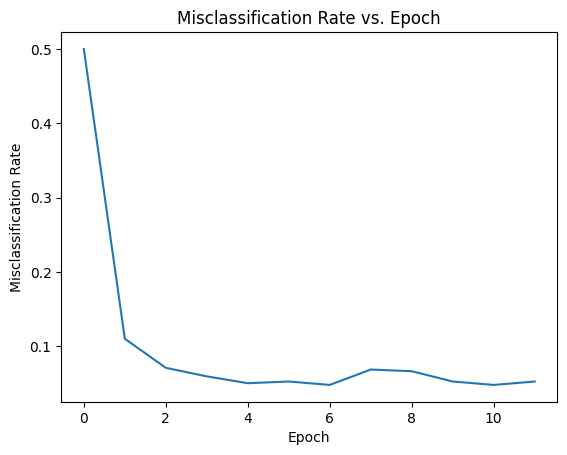

In [10]:
# Learn once on the full voting data set, while gathering info after every epoch
# Then Graph it here.  Here is some sample graph code, but you can do it your own way, including using a bar graph, etc.

def learn_voting_data():
    PATH_TO_VOTING_ARFF = 'datasets/voting_with_missing.arff'

    Data_Set = arff.loadarff(PATH_TO_VOTING_ARFF)
    Data_Set_df = pd.DataFrame(Data_Set[0])
    voting_label_encoded_df = Data_Set_df.apply(LabelEncoder().fit_transform)

    X = voting_label_encoded_df.iloc[:, :-1]
    y = voting_label_encoded_df.iloc[:, -1]

    clf = Perceptron(shuffle=True, verbose=0, eta0=1, warm_start=True, random_state=5)
    clf.fit(X, y)
    num_iter = clf.n_iter_
    
    misclassification_rate = [.50]

    clf = Perceptron(shuffle=True, verbose=0, eta0=1, warm_start=True, random_state=5, max_iter=1)
    for i in range(num_iter):
        clf.fit(X, y)
        misclassification_rate.append(1 - clf.score(X, y))
    
    return misclassification_rate
    
def plot_misclassification(misclassification_rate):
    """
        Plots the misclassification rate
    Args:
        misclassification_rate (array-like): A 1D array or list of missclassifcation rate at every epoch
    """
    plt.plot(np.arange(len(misclassification_rate)), misclassification_rate)
    plt.title("Misclassification Rate vs. Epoch")
    plt.xlabel("Epoch")
    plt.ylabel("Misclassification Rate")
    plt.show()

misclassification_rate = learn_voting_data()
plot_misclassification(misclassification_rate)

*Show table and discuss*

The table above shows the misclassification rate for each epoch. As expected, the misclassification rate decreases as the number of epochs increases. One thing that surprised me was that the rate actually increased on the 7th epoch. This could be because of overfitting of data. We could try feature reduction to see if that helps the model generalize better. It could also be because the shuffle hyperparameter was set to true, so for that epoch, the data was shuffled such that the model happened to predict outputs slightly worse. 

### 3.4 (15%) Hyperparameters
Read over all the Hyperparameters and their defaults in the scikit [perceptron documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html). With the voting data set, experiment briefly with EACH of the following 6 hyperparameters and discuss your findings.
- shuffle
- eta0 - learning rate
- verbose
- fit_intercept - whether to use a bias weight or not
- random state
- warm start

In [11]:
# Run the model with different hyperparameters

PATH_TO_VOTING_ARFF = 'datasets/voting_with_missing.arff'

Data_Set = arff.loadarff(PATH_TO_VOTING_ARFF)
Data_Set_df = pd.DataFrame(Data_Set[0])
voting_label_encoded_df = Data_Set_df.apply(LabelEncoder().fit_transform)

X = voting_label_encoded_df.iloc[:, :-1]
y = voting_label_encoded_df.iloc[:, -1]

# We will call this our baseline model
clf = Perceptron(shuffle=False, verbose=0, eta0=1, warm_start=False, random_state=0, fit_intercept=False)
clf.fit(X, y)
print('Baseline Accuracy:', clf.score(X, y))

# Change shuffle
clf = Perceptron(shuffle=True, verbose=0, eta0=1, warm_start=False, random_state=0, fit_intercept=False)
clf.fit(X, y)
print('Shuffle Accuracy:', clf.score(X, y))

# Change verbose
clf = Perceptron(shuffle=False, verbose=1, eta0=1, warm_start=False, random_state=0, fit_intercept=False)
clf.fit(X, y)
print('Verbose Accuracy:', clf.score(X, y))

# Change eta0
clf = Perceptron(shuffle=False, verbose=0, eta0=.5, warm_start=False, random_state=0, fit_intercept=False)
clf.fit(X, y)
print('Eta0 Accuracy:', clf.score(X, y))

# Change warm_start
clf = Perceptron(shuffle=False, verbose=0, eta0=1, warm_start=True, random_state=0, fit_intercept=False)
clf.fit(X, y)
print('Warm Start Accuracy:', clf.score(X, y))

# Change random_state
clf = Perceptron(shuffle=False, verbose=0, eta0=1, warm_start=False, random_state=5, fit_intercept=False)
clf.fit(X, y)
print('Random State Accuracy:', clf.score(X, y))

# Change fit_intercept
clf = Perceptron(shuffle=False, verbose=0, eta0=1, warm_start=False, random_state=0, fit_intercept=True)
clf.fit(X, y)
print('Fit Intercept Accuracy:', clf.score(X, y))



Baseline Accuracy: 0.9586206896551724
Shuffle Accuracy: 0.960919540229885
-- Epoch 1
Norm: 29.48, NNZs: 15, Bias: 0.000000, T: 435, Avg. loss: 1.505747
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 38.11, NNZs: 15, Bias: 0.000000, T: 870, Avg. loss: 1.140230
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 44.49, NNZs: 16, Bias: 0.000000, T: 1305, Avg. loss: 1.036782
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 48.55, NNZs: 15, Bias: 0.000000, T: 1740, Avg. loss: 1.036782
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 51.44, NNZs: 16, Bias: 0.000000, T: 2175, Avg. loss: 1.025287
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 55.53, NNZs: 16, Bias: 0.000000, T: 2610, Avg. loss: 0.793103
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 59.31, NNZs: 16, Bias: 0.000000, T: 3045, Avg. loss: 0.781609
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 61.66, NNZs: 16, Bias: 0.000000, T: 3480, Avg. loss: 0.864368
Total training time: 0.00 seconds.
-- Epoch 9
Norm:

Discussion

To play with hyperparameters, I created a baseline perceptron with the following hyperparameters:
`clf = Perceptron(shuffle=False, verbose=0, eta0=1, warm_start=False, random_state=0, fit_intercept=False)`

With the baseline model, we achieved an accuracy of .959.

I then ran the perceptron 6 more times, each time changing one of the hyperparameters. Here are the results:

shuffle=True: Accuracy = .961

verbose=1: Accuracy = .959

eta0=.5: Accuracy = .959

warm_start=True: Accuracy = .959

random_state=5: Accuracy = .959

fit_intercept=True: Accuracy = .931

Note: for verbose, you may have to make the output scrollable to see the accuracy

It is interesting that many of the hyperparameters did not actually change the baseline accuracy. For example, I expected that changing the learning rate from 1 to .5 would possibly increase the accuracy, but it did not. I also expected that changing the random state would affect the accuracy, but it did not. However, it did make sense that changing the verbose hyperparameter did not affect the accuracy, since verbose only changes the amount of output that is printed to the console. The only hyperparameters that affected the accuracy were shuffle and fit_intercept. Using shuffle slightly increased the accuracy, and using fit_intercept slightly decreased the accuracy. I was surprised that using fit_intercept decreased the accuracy, since I thought that using a bias would help the perceptron learn better. I'm not quite sure why shuffling the data per epoch would increase the accuracy, but I think it might help the perceptron learn better because it won't get dependent on seeing the same order of data when updating the weights.

## 4 (15%) Use the perceptron to learn one other data set of your choice.  
- The UC Irvine Data Repository is one great source, but you may get your data set from wherever you like, though it should be a real world task.
- Report your results

In [12]:
# Load and Train on your dataset and report results

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
# using the attribute information as the column names
col_names = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width','Class']
df =  pd.read_csv(url, names = col_names)

# remove instances of Iris-virginica
df = df[df['Class'] != 'Iris-virginica']

# convert classes to 0 and 1
df['Class'] = df['Class'].map({'Iris-setosa': 0, 'Iris-versicolor': 1})

clf = Perceptron(shuffle=False, verbose=0, eta0=.1)
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

clf.fit(X, y)
print('Accuracy:', clf.score(X, y))


Accuracy: 1.0


*Discuss how the perceptron did on the data set and why you think it performed as such.*

I learned the classic Iris dataset with the perceptron. In this dataset, the labels are the species of iris flower, and the features are the length and width of the sepals and petals. The perceptron only works with binary output, but there were 3 possible classes in the dataset. To solve this, I removed all instances that were labeled as 'Iris-virginica', leaving only 2 classes: 'Iris-setosa' and 'Iris-versicolor'. This allowed me to have binary output, which I could train and predict using the perceptron. When I trained on the modified data, I achieved 100% accuracy. This may be because I didn't split the data into training and testing sets, so the perceptron was able to learn the data perfectly. It's possible that if I had split the data, the perceptron would have had a lower accuracy. In addition, this dataset is quite small, with only 4 features. This makes it easier for the perceptron to learn the data. If the dataset was larger, the perceptron may have had a lower accuracy.

## 5. (Optional 15% extra credit) Code up your own perceptron learner 

Past versions of this class required students to code up their own version of each model and then compare results with scikit-learn.  Actually coding a model leads to better understanding of what is really happening "under the hood."  Though not required for this class, we give a significant extra credit reward for each lab to those who choose to code their own models.  If you choose to do this, your code must be your own, and NOT taken from any other source (including the text).  Once you are done coding we encourage you to look at other versions to see how yours compares.  Below is a scaffold you could use if you want. Requirements for this task:
- Your perceptron should support the methods shown in the example scaffold below.
- Your output node should output 1 if net is > 0, else 0.
- Use Stochastic/On-line training updates: Iterate and update weights after each training instance (i.e. not batch updates)
- Implement a stopping criteria: when your model has trained for a number of epochs with no improvement in accuracy, stop training. Note that the weights/accuracy do not usually change monotonically.
- Your class can inherit from the relevant scikit-learn learners (e.g. data shuffling, etc.), but don't call any of the super methods to accomplish the core methods in the scaffold.
- Run the evaluation data set and the voting data set above with your Perceptron version. Show and discuss your results and how they compare with the scikit-learn version.

In [13]:
# Optional scaffold for Extra Credit Perceptron code.  IF you use this feel free to change/add any methods you want.

from sklearn.base import BaseEstimator, ClassifierMixin
class PerceptronClassifier(BaseEstimator,ClassifierMixin):

    def __init__(self, lr=.1, shuffle=True):
        """ 
            Initialize class with chosen hyperparameters.
        Args:
            lr (float): A learning rate / step size.
            shuffle: Whether to shuffle the training data each epoch. DO NOT 
            SHUFFLE for evaluation / debug datasets.
        """
        self.lr = lr
        self.shuffle = shuffle

    def fit(self, X, y, initial_weights=None):
        """ 
            Fit the data; run the algorithm and adjust the weights to find a 
            good solution
        Args:
            X (array-like): A 2D numpy array with the training data, excluding
            targets
            y (array-like): A 2D numpy array with the training targets
            initial_weights (array-like): allows the user to provide initial 
            weights
        Returns:
            self: this allows this to be chained, e.g. model.fit(X,y).predict(X_test)
        """

        self.weights = None
        if initial_weights is None:
            self.weights = self.initialize_weights(len(X[0]))
        else:
            self.weights = initial_weights
        targets = y

        # add bias column of 1s to X
        X = np.insert(X, 0, 1, axis=1)

        accuracy = 0
        continue_training = True

        while continue_training:
            indices = np.arange(len(X)) if self.shuffle else range(len(X))
            for index in indices:
                instance = X[index]
                target = targets[index]
                net = np.dot(instance, self.weights)
                output = 1 if net > 0 else 0
                weight_change = self.lr * (target - output) * instance
                self.weights += weight_change
            new_accuracy = self.score(X, y)
            if new_accuracy == accuracy:
                continue_training = False
            else:
                accuracy = new_accuracy

        return self

    def predict(self, X):
        """ 
            Predict all classes for a dataset X
        Args:
            X (array-like): A 2D numpy array with the training data, excluding 
            targets
        Returns:
            array, shape (n_samples,)
                Predicted target values per element in X.
        """
        predictions = []

        for instance in X:
            net = np.dot(instance, self.weights)
            output = 1 if net > 0 else 0
            predictions.append(output)

        return predictions

    def initialize_weights(self, numFeatures):
        """ Initialize weights for perceptron. Don't forget the bias!
        Returns:
        """
        return np.zeros(numFeatures + 1)


    def score(self, X, y):
        """ 
            Return accuracy of model on a given dataset. Must implement own 
            score function.
        Args:
            X (array-like): A 2D numpy array with data, excluding targets
            y (array-like): A 2D numpy array with targets
        Returns:
            score : float
                Mean accuracy of self.predict(X) wrt. y.
        """

        # add bias column of 1s to X if needed
        if len(X[0]) != len(self.weights):
            X = np.insert(X, 0, 1, axis=1)
        
        predictions = self.predict(X)
        num_correct = 0

        for i in range(len(predictions)):
            if predictions[i] == y[i]:
                num_correct += 1
        
        score = num_correct / len(predictions)

        return score

    ### Returns the weights and bias. Not required but great for debugging.
    def get_weights(self):
        return self.weights
    

def testWithVotingDataset():
    PATH_TO_VOTING_ARFF = 'datasets/voting_with_missing.arff'

    Data_Set = arff.loadarff(PATH_TO_VOTING_ARFF)
    Data_Set_df = pd.DataFrame(Data_Set[0])
    voting_label_encoded_df = Data_Set_df.apply(LabelEncoder().fit_transform)

    voting_numpy = voting_label_encoded_df.to_numpy()

    X = voting_numpy[:, :-1]
    y = voting_numpy[:, -1]

    clf = PerceptronClassifier(lr=1, shuffle=False)
    clf.fit(X, y)
    print('Voting Dataset Accuracy:', clf.score(X, y))

def testWithEvaluationDataset():
    PATH_TO_EVAL_ARFF = 'datasets/data_banknote_authentication.arff'

    Data_Set = arff.loadarff(PATH_TO_EVAL_ARFF)
    Data_Set_df = pd.DataFrame(Data_Set[0])
    Data_Set_np = Data_Set_df.to_numpy()
    Data_Set_np = Data_Set_np.astype(float)
    X = Data_Set_np[:, :-1]
    y = Data_Set_np[:, -1]

    clf = PerceptronClassifier(lr=.1, shuffle=False)
    clf.fit(X, y)
    print('Evaluation Dataset Accuracy:', clf.score(X, y))


testWithVotingDataset()
testWithEvaluationDataset()


Voting Dataset Accuracy: 0.9379310344827586
Evaluation Dataset Accuracy: 0.9912536443148688


*Discussion*

I wrote my custom Perceptron class and learned the full voting dataset and the evaluation dataset from above. I used the same hyperparameters as well. Here are the results:

Evaluation dataset with sci-kit learn : Accuracy = .977 (From above, 1.2)
Evaluation dataset with my custom Perceptron: Accuracy = .991
Voting dataset with sci-kit learn: Accuracy = .931 (From above, 3.2)
Voting dataset with my custom Perceptron: Accuracy = .938

My custom Perceptron performed better than the sci-kit learn version on both datasets. This was very surprising to me, because my implementation is probably much simpler than the sci-kit learn version. I've been trying to think of reasons, for why my implementation performed better, and I can't really think of any. Further testing would be needed with more datasets and with train-test splits to see if patterns emerge that could explain the performance of my model better. My stopping criteria was as soon as the accuracy stopped improving, which is probably not the best stopping criteria. It might be better to run a few more epochs after the accuracy stops improving, especially if the shuffling hyperparameter is set to True. 